# 3. データ表現と特徴量エンジニアリング

# 3.1 カテゴリ変数と連続値変数

特徴量には、カテゴリを表すものと、連続値を表すものがあり、機械学習モデルに与える前に適切に前処理を行う必要がある。

- カテゴリ変数 - 離散値。ラベルのようなもの
  例: 性別、婚姻状態など
  注意: 数値データのように見えても、カテゴリとして扱うべきものも多い  
  例: 郵便番号、電話のエリア番号など

- 連続値変数 - 数値データ
  例: 価格

- 順序付き変数 - 離散値だが、明らかに順序のあるもの  
  例: 成績 (優、良、可、不可)

例: 国勢調査の結果から、収入が50Kドル以上かどうかを予測するデータセット

In [1]:
# hide
# Download
DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)
import subprocess
from pathlib import Path

def download():
    for u in DATASET: 
        f = u.split("/")[-1]
        subprocess.run(["curl", u, "-o", str(Path("data") / f)])
# download()        
import pandas as pd
file_name = "data/adult.data"

labels = """age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
target""".split("\n")

df = pd.read_csv(file_name, header=None, names=labels)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [54]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

## 3.2 One-Hot Encoding

- カテゴリ変数を機械学習モデルで扱うには何らかの方法で数値に変換しなければならない。
- 個々のカテゴリ値ごとにそれぞれ1-0特徴量を割当てる。  
   例: 特徴量X が A,B,C,D の4つの値をとるとする。それぞれ特徴量 A,B,C,D を導入し、1,0を割り当てる。

動作がわかりやすいように、特徴量を3つだけに絞って変換してみる。

In [55]:
# 特徴量を減らしたデータフレームを作る
shrinked = df[['age', 'workclass', 'target']]
shrinked

,age,workclass,target
0,39,State-gov,<=50K
1,50,Self-emp-not-inc,<=50K
2,38,Private,<=50K
3,53,Private,<=50K
4,28,Private,<=50K
...,...,...,...
32556,27,Private,<=50K
32557,40,Private,>50K
32558,58,Private,<=50K
32559,22,Private,<=50K


In [56]:
# One-hot encodeを行う
pd.get_dummies(shrinked)

,age,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,target_ <=50K,target_ >50K
0,39,0,0,0,0,0,0,0,1,0,1,0
1,50,0,0,0,0,0,0,1,0,0,1,0
2,38,0,0,0,0,1,0,0,0,0,1,0
3,53,0,0,0,0,1,0,0,0,0,1,0
4,28,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,0,0,1,0,0,0,0,1,0
32557,40,0,0,0,0,1,0,0,0,0,0,1
32558,58,0,0,0,0,1,0,0,0,0,1,0
32559,22,0,0,0,0,1,0,0,0,0,1,0


連続値特徴量である`age`はそのままで、`workclass`と`target`が複数の0/1特徴量に変換されたことがわかる。

全体に対してOne-hotエンコードを行い、学習してみる。

In [3]:
# One-hot エンコード
df_e = pd.get_dummies(df)
df_e

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ <=50K,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [58]:
# 目標変数を切り出し
target = df_e['target_ <=50K']
# 目標変数をデータフレームから削除
df_e = df_e.drop(columns=['target_ <=50K', 'target_ >50K'])

In [59]:
# データフレームのままでは学習できないので、numpy配列に変換する
df_e.to_numpy()

array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    58, 151910,      9, ...,      1,      0,      0],
       [    22, 201490,      9, ...,      1,      0,      0],
       [    52, 287927,      9, ...,      1,      0,      0]])

In [60]:
# 目標変数も変換する
target.to_numpy()

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(df_e.to_numpy(), target.to_numpy(), random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [62]:
import numpy as np
from sklearn.metrics import accuracy_score
print(np.mean((predicted == y_test)))
print(accuracy_score(predicted, y_test))

0.8073946689595872
0.8073946689595872


In [63]:
from sklearn.ensemble import RandomForestClassifier

def eval_classifier(mdl, X_train, X_test, y_train, y_test):
    mdl.fit(X_train, y_train)
    print("{}\ttrain: {}\ttest: {}".format(
        mdl.__class__.__name__,
        accuracy_score(mdl.predict(X_train), y_train), 
        accuracy_score(mdl.predict(X_test), y_test)))
eval_classifier(RandomForestClassifier(), X_train, X_test, y_train, y_test)


RandomForestClassifier	train: 0.9998771498771499	test: 0.8595995577938829


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
 
eval_classifier(GradientBoostingClassifier(), 
                X_train, X_test, y_train, y_test)

GradientBoostingClassifier	train: 0.8687141687141687	test: 0.8711460508537034


In [65]:
eval_classifier(LogisticRegression(), X_train, X_test, y_train, y_test)

LogisticRegression	train: 0.793980343980344	test: 0.8073946689595872


## 3.3 多項式特徴量

- 特徴量エンジニアリング
    特徴量を工夫することで同じモデルでもより正確な予測が可能になる

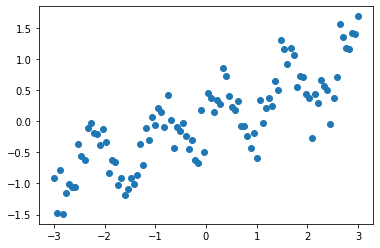

In [66]:
# データを作る
# 1次間数 + サインカーブ + ガウシアンノイズ
import numpy as np
import matplotlib.pyplot as plt
a, b, f, s = 0.3, 0.5, 5, 0.2

Xp = np.linspace(-3, 3, 100)
y = a * Xp + b * np.sin(Xp * f) + np.random.normal(scale=s, size=Xp.shape)
X = Xp.reshape(-1, 1)
plt.scatter(Xp, y)

In [67]:
#  線形回帰で学習する
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X, y)
# 学習された線の確認
mdl.coef_, mdl.intercept_

(array([0.33092827]), 0.015440034883328945)

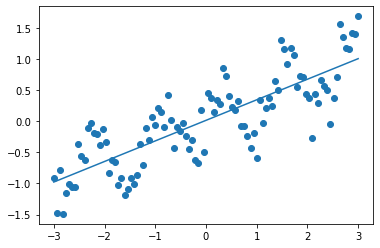

In [68]:
# 可視化
plt.scatter(X, y)
plt.plot(Xp, mdl.predict(X))

通常の線形回帰では十分に近似できていない

#### 多項式特徴量
入力特徴量の2乗、3乗...を加える。

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(100, 15)

In [70]:
poly.get_feature_names()

['x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10',
 'x0^11',
 'x0^12',
 'x0^13',
 'x0^14',
 'x0^15']

これらの新たに追加された特徴量を用いて学習する。

In [71]:
mdl.fit(X_poly, y)
mdl.coef_, mdl.intercept_

(array([ 1.88565057e+00,  8.65553934e-02, -6.63927122e+00, -4.22808538e-01,
         7.39348937e+00,  3.43998938e-01, -3.52046849e+00, -1.17207613e-01,
         8.54011361e-01,  1.97804723e-02, -1.11264120e-01, -1.63888334e-03,
         7.43799903e-03,  5.33029055e-05, -2.00742591e-04]),
 0.038701474006489676)

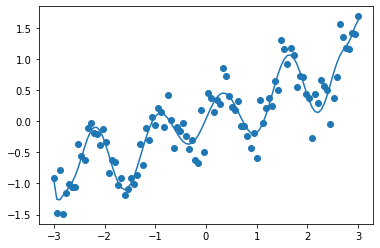

In [72]:
# 可視化
plt.scatter(X, y)
plt.plot(Xp, mdl.predict(X_poly))

複数の特徴量がある場合、それぞれの特徴量の積をあらたな特徴量とすることもできる。これを交互作用特徴量と呼ぶ。
交互作用特徴量も`PolynominalFeatures`で利用できる。

## 3.4 特徴量選択
- 特徴量を増やすことは簡単にできる
- しかしすべての特徴量が学習に有効とは限らない
- 目標変数の予測に役に立たないと思われる特徴量を削ることで、性能を向上させることができる(場合がある)
- モデルの意味を解釈する上でも関与する特徴量が少ないほうがいい

乳癌データセットを用いる。無効な特徴量を模すために、ランダムな特徴量を加える。

In [4]:
# データのロード

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
ss = StandardScaler()
X_org = cancer.data
rnd = np.random.RandomState(42)
# ノイズの生成と追加
noise = rnd.normal(size=(len(cancer.data), 50))
X_add = np.hstack([X_org, noise])

# 標準化
ss.fit(X_add)
X = ss.transform(X_add)
y = cancer.target
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

NameError: name 'np' is not defined

もともとの30の特徴量に対してノイズを50加えた。

### 単変量特徴量選択

- 個々の特徴量と目標変数の相関を見る
- 複数の特徴量が集まって影響するようなものはうまく検出できない

In [74]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=40)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape


(398, 32)

特徴量が80から32に減ったことがわかる。

削除された特徴量を確認する。

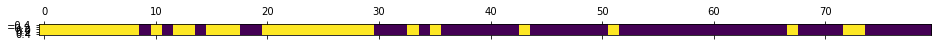

In [75]:
plt.matshow(select.get_support().reshape(1, -1))

- ノイズでも残ってしまっているものもある
- もともと含まれていたものもいくつか落とされてしまっている

In [76]:
# 特徴量選択を行わない場合の性能
mdl = LogisticRegression()
mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)
accuracy_score(y_test, y_predict)


0.935672514619883

In [77]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)


0.9649122807017544

### モデルベース特徴量選択

- モデルによっては、個々の特徴量の重要性指標を出力するものがある。この指標を用いて特徴量を選択する
- 特徴量選択に用いるモデルと、最終的なターゲットモデルは同じである必要はない


In [78]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(random_state=42), 
                         max_features=30)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape



(398, 18)

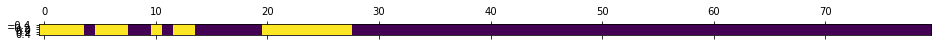

In [79]:
plt.matshow(select.get_support().reshape(1, -1))

In [80]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)

0.9883040935672515

### 反復特徴量選択

- 寄与の小さい特徴量を削除する
- これを予め決めた数になるまで繰り返し行う
- 重要性指標を出力することのできるモデルが必要

In [81]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(random_state=42), 
            n_features_to_select=20)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape


(398, 20)

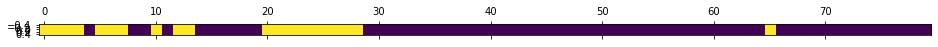

In [82]:
plt.matshow(select.get_support().reshape(1, -1))

In [83]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)

0.9941520467836257

### 3.5 専門家知識の利用

- アプリケーションのドメイン知識を利用して特徴量を作成する
- 例えば、コンビニの売上予測するのに、近隣の高校で運動会がある、というのは非常に大きな影響がある
    - しかしデータのテーブル上には現れない

オライリー「Pythonではじめる機械学習」の著者の家の前にあるレンタル自転車の台数予測


In [84]:
import os
data_mine = pd.read_csv(os.path.join("data", "citibike.csv"))
data_mine['one'] = 1
data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
data_starttime = data_mine.set_index("starttime")
data_resampled = data_starttime.resample("3h").sum().fillna(0)
citibike = data_resampled.one

In [85]:
# データを見る。予測変数は時刻だけ、目的変数は台数
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

Text(0, 0.5, 'Rentals')

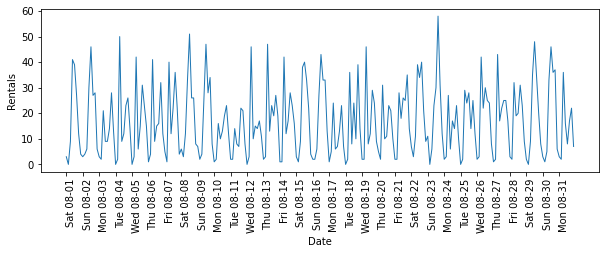

In [86]:
# 可視化する
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), 
                        end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")


- 明確な24時間周期が見て取れる
- 週単位の周期もみえる

まずは単純に時刻のUnix時間を特徴量として予測を試みる。

> **Unix時間**  
> 1970年1月1日0時0分0秒(UTC)からの秒数で時刻を表現する。
> 2038年1月に32ビット整数で表せる範囲がおわることから混乱が予想されている。

In [87]:
# hideoutput
X = citibike.index.astype("Int64").to_numpy().reshape(-1, 1) // 10**9
y = citibike.values
X[:, 0], y

(array([1438387200, 1438398000, 1438408800, 1438419600, 1438430400,
        1438441200, 1438452000, 1438462800, 1438473600, 1438484400,
        1438495200, 1438506000, 1438516800, 1438527600, 1438538400,
        1438549200, 1438560000, 1438570800, 1438581600, 1438592400,
        1438603200, 1438614000, 1438624800, 1438635600, 1438646400,
        1438657200, 1438668000, 1438678800, 1438689600, 1438700400,
        1438711200, 1438722000, 1438732800, 1438743600, 1438754400,
        1438765200, 1438776000, 1438786800, 1438797600, 1438808400,
        1438819200, 1438830000, 1438840800, 1438851600, 1438862400,
        1438873200, 1438884000, 1438894800, 1438905600, 1438916400,
        1438927200, 1438938000, 1438948800, 1438959600, 1438970400,
        1438981200, 1438992000, 1439002800, 1439013600, 1439024400,
        1439035200, 1439046000, 1439056800, 1439067600, 1439078400,
        1439089200, 1439100000, 1439110800, 1439121600, 1439132400,
        1439143200, 1439154000, 1439164800, 1439

#### データの分割
- 時系列データの訓練セット、テストセット分割は注意を要する
    - 通常のデータのように、ランダムに分割すると、時間的に非常に近いデータ点が、訓練セットとテストセット
    に分散する可能性がある
    - ある種のリークのような事が起こる
- 一般に、時系列データは、時間方向で分割し、時刻的に前のデータで学習、後のデータで検証・テストを行う

ここでも前半184点を訓練とし、残りをテストとする。

In [88]:

def eval_on_features(features, target, regressor):
    # トレーニングセットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    # 目標値も同様に分割
    y_train, y_test = target[:n_train], target[n_train:]
    # モデルを訓練し、R2スコアで評価
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    # 以下評価値をプロット
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), 
               rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', 
             label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.00


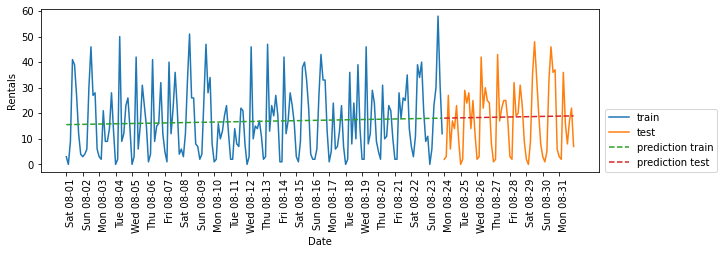

In [89]:
# まずは生の特徴量でためしてみる。線形回帰を用いる
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
eval_on_features(X, y, mdl)

全く予測ができていないことがわかる

ここから特徴量を工夫していく。

Test-set R^2: 0.11


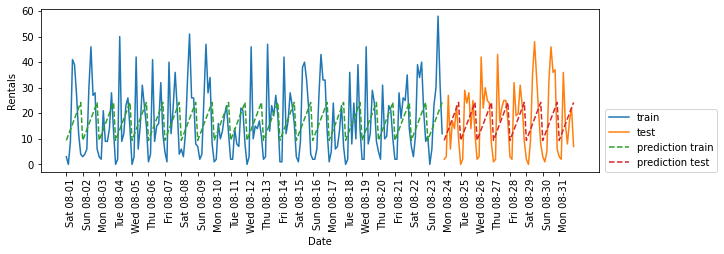

In [90]:
# 一日の中の時刻だけで予測

X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, mdl)

一日中での変動を捉えられるようになったが、線形モデルなので右肩上がりの直線しか見えない。

次に曜日の情報を加える。連続変数として与える。

Test-set R^2: 0.13


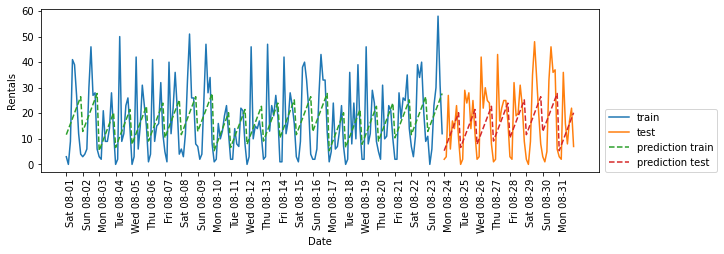

In [91]:
# 曜日情報を導入する

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, mdl)

一週間の変動も見えるようになったが、やはり右肩上がり。これは、曜日の情報を連続値として与えているから。

次に曜日と時間をカテゴリ変数として扱う。

Test-set R^2: 0.61


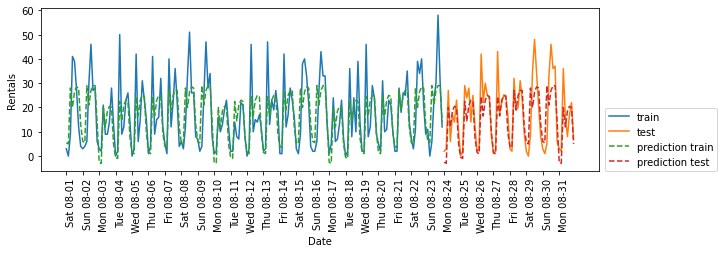

In [92]:
# 曜日、時刻を連続値ではなく、Onehotエンコードする

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, mdl)

かなりよくなったが、曜日と時刻の相関を捉える事ができない。

例えば、日曜の午後は混む、といった情報を捉えられない。

これに対処するために、交互作用特徴量(多項式特徴量)を導入する。

Test-set R^2: 0.78


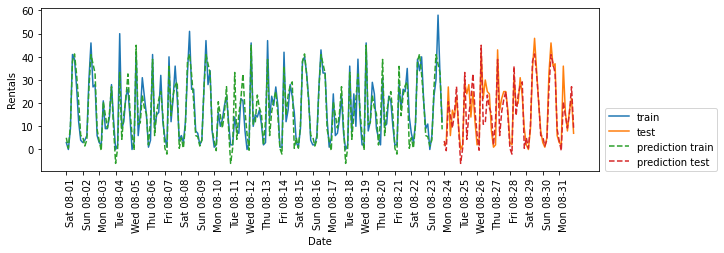

In [93]:
# 交互作用特徴量の導入

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
eval_on_features(X_hour_week_onehot_poly, y, mdl)


かなり良い結果が得られた。